In [32]:
import sys
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib
import graphviz
import numpy as np

In [108]:
#szDatasetPath = 'breast_cancer.csv'
szDatasetPath = 'titanic_train.csv'

'''
Read the data from the csv file
listColNames[j] stores the jth column name
listData[i][:-1] are the features of the ith example
listData[i][-1] is the target value of the ith example
'''
listColNames = [] # The list of column names
listData = [] # The list of feature vectors of all the examples
nRow = 0
with open(szDatasetPath) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    for row in csvReader:
        if 0 == nRow:
            listColNames = row
        else:
            listData.append(row)
        nRow += 1

'''
Scan the data and store the unique values of each column.
listColUniqueVals[j] stores a list of unique values of the jth column
'''
listColUniqueVals = [[] for i in range(len(listColNames))]
for example in listData:
    for i in range(len(example)):
        if example[i] not in listColUniqueVals[i]:
            listColUniqueVals[i].append(example[i])


In [109]:
listColNames

['First_class', 'Sex', 'Age', 'SibSp', 'ParCh', 'Embarked', 'Survived']

In [110]:
listColUniqueVals

[['0', '1'],
 ['0', '1'],
 ['0', '1'],
 ['0', '1'],
 ['1', '0'],
 ['0', '1'],
 ['1', '0']]

In [ ]:
listData

In [111]:
#Calculate entropy of an array
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [112]:
#Compute the value of information gain = entropy before - entropy after
def informationGain(parent, left, right):
    entropyAfter = (len(left)/len(parent))*entropy(left) + (len(right)/len(parent))*entropy(right)
    return (entropy(parent) - entropyAfter)

In [113]:
def trainErrorRate(parent,left,right):
    maxCountLeft=0
    maxCountRight=0
    if(left.count(1)>=left.count(0)):
        maxCountLeft=left.count(1)
    else:
        maxCountLeft=left.count(0)
    if(right.count(1)>=right.count(0)):
        maxCountRight=right.count(1)
    else:
        maxCountRight=right.count(0)
    return 1-(maxCountLeft+maxCountRight)/len(parent)

In [114]:
#Label encoder to use when encoding features and labels
le = preprocessing.LabelEncoder()

In [115]:
#Encode the label array
classCol = [row[-1] for row in listData]
classColEncoded = le.fit_transform(classCol)

In [116]:
#New list data to store encoded feature
newListData = []
#Iterate through all features
for i in range(0,len(listColNames)-1):
    #Create a feature array, then encode it for decision tree
    featureCol = [row[i] for row in listData]
    featureCol = le.fit_transform(featureCol)
    newListData.append(featureCol)
    #Print out feature values and feature names, for debug
    #print(featureCol)
    print(listColNames[i])
    
    #Variables to save best split point
    bestSplit = 0
    maxInfoGain = 0
    
    #Since the encoded features are ints like 0,1,2,3,4,5, then we separate the data by using 0.5,1.5,2.5,3.5,etc
    for i in range(len(listColUniqueVals[i])):
        i2= i+0.5
        
        #Label arrays of 2 parts of the separated data, will be used to calculate entropy
        left = []
        right = []
        for x in range(len(featureCol)):
            if(featureCol[x]<i2):
                left.append(classColEncoded[x])
            elif(featureCol[x]>i2):
                right.append(classColEncoded[x])
        
        #Print entropy and information gain, for debug
        #print("left node entropy " + str(i2) + ": "+str(entropy(left)))
        #print("right node entropy " + str(i2) + ": "+str(entropy(right)))
        #print("info gained ",str(i2),str(informationGain(classColEncoded.tolist(),left,right)))
        
        #Choose best information gain value to split
        infoGain = informationGain(classColEncoded.tolist(),left,right)
        if(infoGain > maxInfoGain):
            maxInfoGain = infoGain
            bestSplit = i2

    print("Train error ",trainErrorRate(classColEncoded.tolist(),left,right)," split ",bestSplit)
    print()

First_class
Train error  0.4061624649859944  split  0.5

Sex
Train error  0.4061624649859944  split  0.5

Age
Train error  0.4061624649859944  split  0.5

SibSp
Train error  0.4061624649859944  split  0.5

ParCh
Train error  0.4061624649859944  split  0.5

Embarked
Train error  0.4061624649859944  split  0.5



In [117]:
#Convert and transpose new listData
encodedData = np.array(newListData)
encodedData=encodedData.transpose()

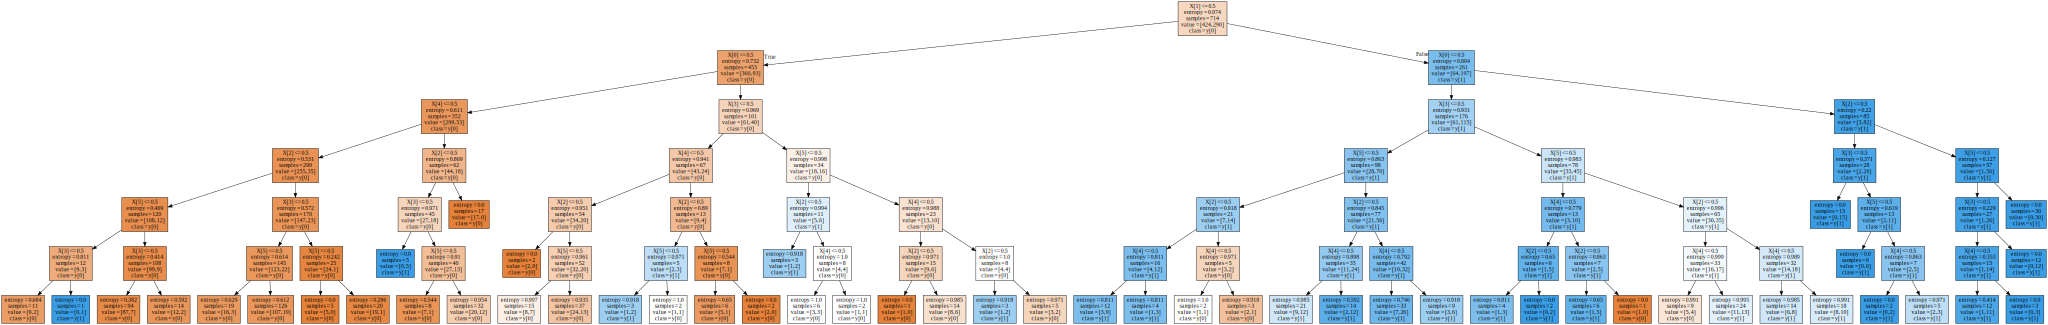

In [140]:
decisiontree = tree.DecisionTreeClassifier(max_depth=50,criterion='entropy')
decisiontree.fit(encodedData,classColEncoded)
dot_data = tree.export_graphviz(decisiontree, out_file=None,filled=True, class_names=True)
graph = graphviz.Source(dot_data)
graph

In [141]:
print(decisiontree.score(encodedData,classColEncoded))

0.7969187675070029
